## Acronyms: 
**LR**: Logistic Regression<br>
**RF**: Random Forest<br>
**KNN**: K-Nearest Neighbours<br>
**SVM**: Support Vector Machine <br>
**LP**: Label Propagation <br>
**LP-K-BE**: Model BE trained on data labeled by LP(kernel = 'knn').<br>
**LP-R-BE**: Model BE trained on data labeled by LP(kernel = 'rbf')<br>
See https://scikit-learn.org/stable/modules/generated/sklearn.semi_supervised.LabelPropagation.html for more details.<br>
**f1-score ratio**: For a LP-T-BE/LR-K-BE we define the f1-score ratio as f1(LP-BE) / f1(BE). The purpose of this metric is to show the improvement (or degradation) from relabeling unlabeled data using LP.
    
## Intro

The goal is to test, when in the presence of unlabeled data, if it is beneficial to relabel the data using label propagation prior to training with a classifier.

This is done by comparing the performance between several classifiers (LR, RF, KNN, SVM) when each of 10%, 20%, ..., 90% of the data is unlabeled and when that data is relabeled through label propagation. In particular, we look at the distribution of the f1-scores (when the data is unlabeled) and the distribution of the f1-score ratios (when the unlabeled data is relabeled).

Note that in this experiment we only look at small datasets because 1. LP is $O(n^2)$ and 2. with large datasets LP is likely to be redundant.
### Psuedo Code

$D$ = dataset <br>
$M$ = [LR, RF, KNN, SVM, LP-K-LR, LP-K-RF, LP-K-KNN, LP-K-SVM, LP-R-LR, LP-R-RF, LP-R-KNN, LP-R-SVM] <br> 
    
For $i$ in 1,2,...,30:

> 80% of $D$ is randomally sampled (stratified) to create training set $Tr_i$ with the remaining 20% as the test set
    $Te_i$. <br>
For $j$ in 10,20,...,90: <br>
> > $j$% of $Tr_i$ is randomally unlabelled. <br>
> > $Tr_i$ is relabeled using LP(kernel = 'knn') for $Tr_iK$ and LP(kernel = 'rbf') for $Tr_iR$. <br>
> > For $m$ in $M$:
> > > If $m$ is in [LR, RF, KNN, SVM] $m$ is trained on $Tr_i$ <br>
> > > If $m$ is in [LP-K-LR, LP-K-RF, LP-K-KNN, LP-K-SVM] $m$ is trained on $Tr_iK$ <br>
> > > If $m$ is in [LP-R-LR, LP-R-RF, LP-R-KNN, LP-R-SVM] $m$ is trained on $Tr_iR$<br>
> > > $m$ is validated on $Te_i$, resulting in an f1-score $ f_{ijm} $.<br>
      
The f1-scores are grouped over $i$ yielding an empirical distribution of the f1-scores for each model and percentage of missing data: $f_{jm} \sim \{f_{ijm}\}_{i=1}^{30}$.

## Experiment Results

In [1]:
import pandas as pd

from scripts.preprocess import preprocessData
from scripts.runLabelPropogationExperiment import runExperiment

nrows:  900
n_features (post encoding):  6
target distribution:  0    450
1    450
Name: Class, dtype: int64


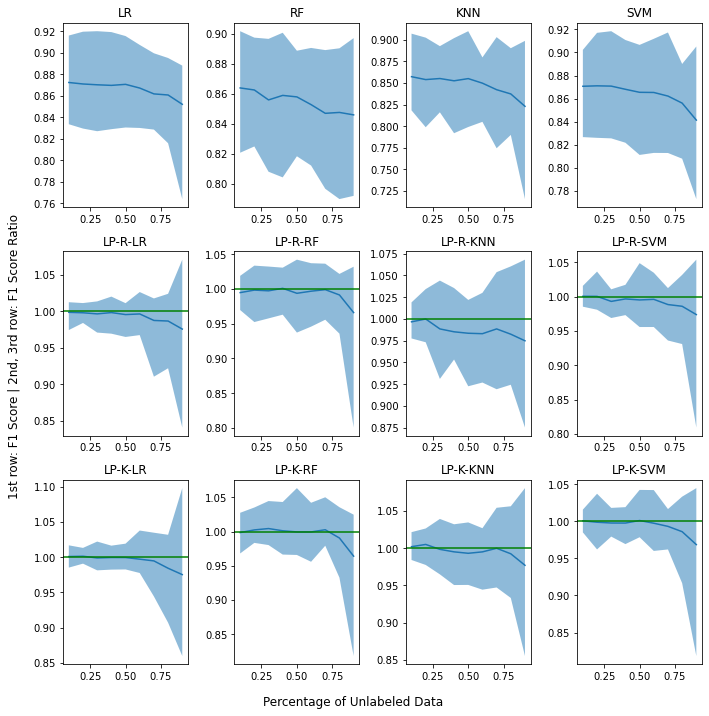

In [2]:
# Data set reference:
# [1] Classification of Raisin Grains Using Machine Vision and Artificial Intelligence Methods, Gazi Journal of Engineering Sciences (CINAR I., KOKLU M. & TASDEMIR S., 2020)

X, y = preprocessData(pd.read_csv('C:/Users/Puri/Desktop/repos/Experimentation/datasets/raisin.csv'),
              numeric_features = ['MajorAxisLength', 'MinorAxisLength', 'Eccentricity', 'ConvexArea', 'Extent', 'Perimeter'],
              categorical_features = [],
              target = 'Class',
              label_dic = {'Kecimen': 0, 'Besni': 1})

#increased max iterations to 10k to ensure convergence
experiment = runExperiment(n_splits = 30, test_size = 0.2, f1_average_param = 'binary', max_iter = 10000)
experiment.fit(X,y)
experiment.plot()

LP had the potential to make up for the loss in performance but, on average, was detrimental.

nrows:  150
n_features (post encoding):  4
target distribution:  0    50
1    50
2    50
Name: class, dtype: int64


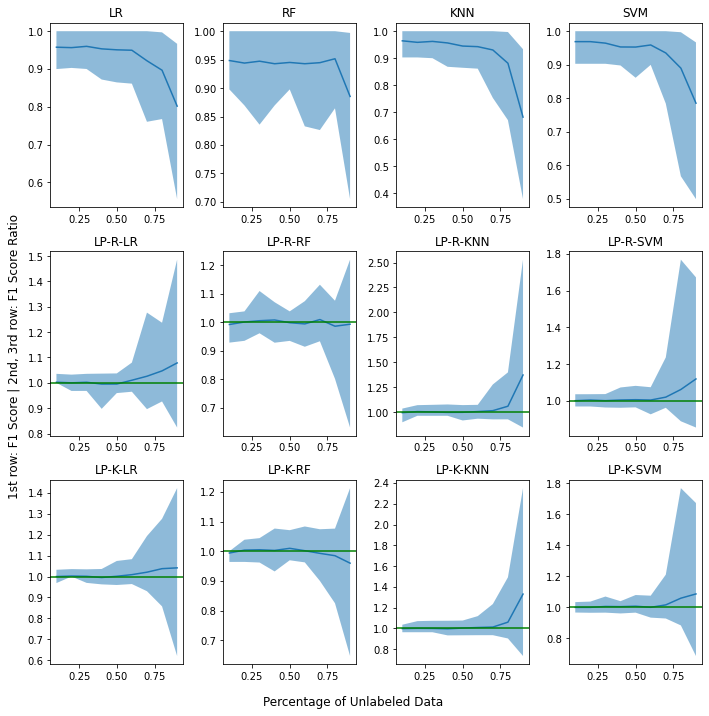

In [5]:
# Data set reference:
# [2] UCI Machine Learning Repository (Dua, D. & Graff, C. 2019)

X, y = preprocessData(pd.read_csv('C:/Users/Puri/Desktop/repos/Experimentation/datasets/iris.csv'),
              numeric_features = ['sepal length','sepal width', 'petal length', 'petal width'],
              categorical_features = [],
              target = 'class',
              label_dic = {'Iris-setosa': 0, 'Iris-versicolor': 1, 'Iris-virginica': 2})

#increased max iterations to 10k to ensure convergence
experiment = runExperiment(n_splits = 30, test_size = 0.2, f1_average_param = 'macro',  max_iter = 10000)
experiment.fit(X,y)
experiment.plot()

LP was generally benefitial. In fact for KNN and SVM it had the rare case where it made up for almost all the loss in performance. The only case it was not benefitial was for RF but RF had hardly any loss in performance to begin with.

nrows:  1473
n_features (post encoding):  24
target distribution:  1    629
3    511
2    333
Name: contraceptive method, dtype: int64


C:\Users\Puri\anaconda3\envs\sklearn-env\lib\site-packages\sklearn\semi_supervised\_label_propagation.py:316: ConvergenceWarning: max_iter=20000 was reached without convergence.
  warnings.warn(
C:\Users\Puri\anaconda3\envs\sklearn-env\lib\site-packages\sklearn\semi_supervised\_label_propagation.py:316: ConvergenceWarning: max_iter=20000 was reached without convergence.
  warnings.warn(


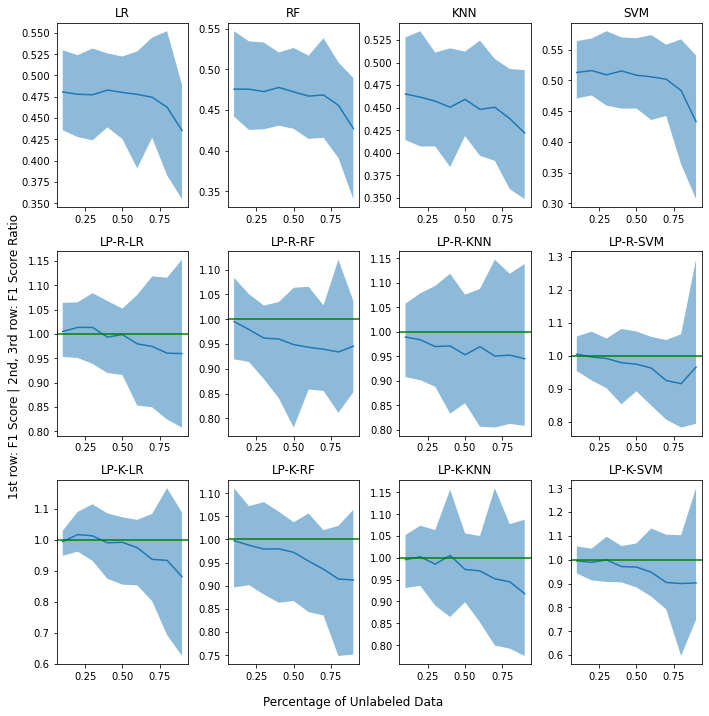

In [6]:
# Data set reference:
# [3] UCI Machine Learning Repository (Dua, D. & Graff, C. 2019)

X, y = preprocessData(pd.read_csv('C:/Users/Puri/Desktop/repos/Experimentation/datasets/cmc.csv'),
              numeric_features = ['wife age', 'number of children'],
              categorical_features = ['wife education', 'husband education', 'wife religion', 'wife working',
                                     'husband occupation', 'standard of living', 'media exposure'],
              target = 'contraceptive method',
              label_dic = None)

#increased max iterations to 20k, still had a few iterations that did not converge
experiment = runExperiment(n_splits = 30, test_size = 0.2, f1_average_param = 'macro', max_iter = 20000)
experiment.fit(X,y)
experiment.plot()

On average label propogation is detrimental.

nrows:  1941
n_features (post encoding):  31
target distribution:  0    1751
1     190
Name: Z_Scratch, dtype: int64


C:\Users\Puri\anaconda3\envs\sklearn-env\lib\site-packages\numpy\lib\function_base.py:4486: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)
C:\Users\Puri\anaconda3\envs\sklearn-env\lib\site-packages\numpy\lib\function_base.py:4486: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)


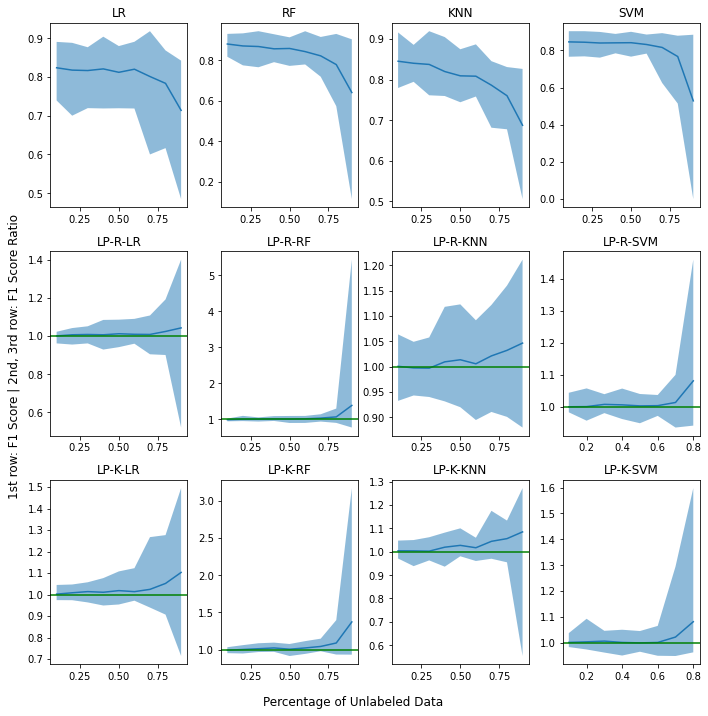

In [7]:
# Data set reference:
# [4] Steel Plates Faults (Research Center of Sciences of Communication, 2010)

X, y = preprocessData(pd.read_csv('C:/Users/Puri/Desktop/repos/Experimentation/datasets/faults.csv', sep = '\t'),
              numeric_features = ['X_Minimum', 'X_Maximum', 'Y_Minimum', 'Y_Maximum', 'Pixels_Areas', 'X_Perimeter',
                                 'Y_Perimeter', 'Sum_of_Luminosity', 'Minimum_of_Luminosity', 'Maximum_of_Luminosity',
                                 'Length_of_Conveyer', 'Steel_Plate_Thickness', 'Edges_Index', 'Empty_Index', 'Square_Index',
                                 'Outside_X_Index', 'Edges_X_Index', 'Edges_Y_Index', 'LogOfAreas', 'Log_X_Index',
                                 'Log_Y_Index', 'Orientation_Index', 'Luminosity_Index', 'SigmoidOfAreas'],
              categorical_features = ['TypeOfSteel_A300', 'TypeOfSteel_A400', 'Outside_Global_Index'],
              target = 'Z_Scratch',
              label_dic = None)

#increased max iterations to 20k to ensure convergence
experiment = runExperiment(n_splits = 30, test_size = 0.2, f1_average_param = 'binary', max_iter = 20000)
experiment.fit(X,y)
experiment.plot()

We had 2 LP-R iterations with overflow/underflow issues (this is not an easy fix even with tuning gamma). Nevertheless, LP was significantly beneficial and its benefit increased as the missing data increased.

nrows:  1941
n_features (post encoding):  31
target distribution:  0    1539
1     402
Name: Bumps, dtype: int64


C:\Users\Puri\anaconda3\envs\sklearn-env\lib\site-packages\numpy\lib\function_base.py:4489: RuntimeWarning: invalid value encountered in subtract
  subtract(b, diff_b_a * (1 - t), out=lerp_interpolation, where=t >= 0.5)
C:\Users\Puri\anaconda3\envs\sklearn-env\lib\site-packages\numpy\lib\function_base.py:4489: RuntimeWarning: invalid value encountered in subtract
  subtract(b, diff_b_a * (1 - t), out=lerp_interpolation, where=t >= 0.5)


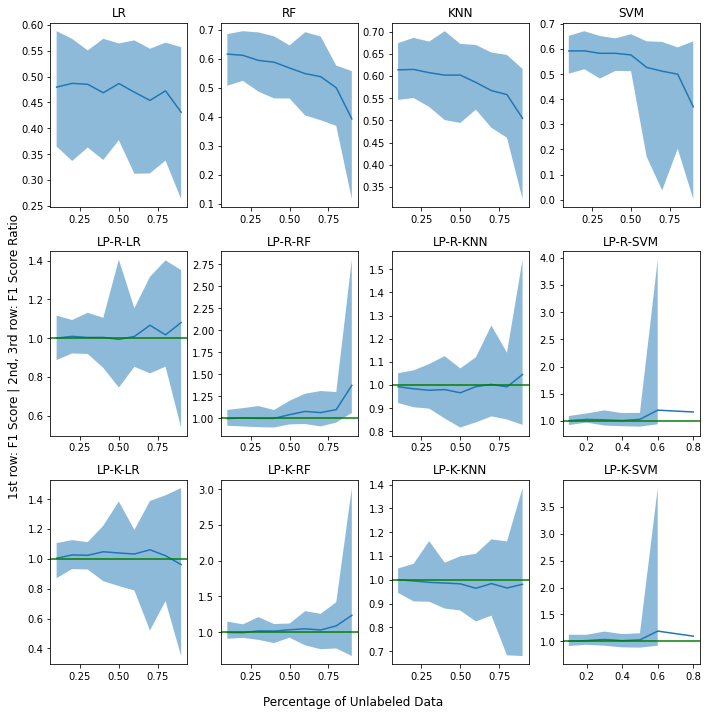

In [9]:
# Data set reference:
# [4] Steel Plates Faults (Research Center of Sciences of Communication, 2010)

X, y = preprocessData(pd.read_csv('C:/Users/Puri/Desktop/repos/Experimentation/datasets/faults.csv', sep = '\t'),
              numeric_features = ['X_Minimum', 'X_Maximum', 'Y_Minimum', 'Y_Maximum', 'Pixels_Areas', 'X_Perimeter',
                                 'Y_Perimeter', 'Sum_of_Luminosity', 'Minimum_of_Luminosity', 'Maximum_of_Luminosity',
                                 'Length_of_Conveyer', 'Steel_Plate_Thickness', 'Edges_Index', 'Empty_Index', 'Square_Index',
                                 'Outside_X_Index', 'Edges_X_Index', 'Edges_Y_Index', 'LogOfAreas', 'Log_X_Index',
                                 'Log_Y_Index', 'Orientation_Index', 'Luminosity_Index', 'SigmoidOfAreas'],
              categorical_features = ['TypeOfSteel_A300', 'TypeOfSteel_A400', 'Outside_Global_Index'],
              target = 'Bumps',
              label_dic = None)

#increased max iterations to 10k to ensure convergence
experiment = runExperiment(n_splits = 30, test_size = 0.2, f1_average_param = 'binary', max_iter = 10000)
experiment.fit(X,y)
experiment.plot()

We had 2 LP-R iterations with overflow/underflow issues (this is not an easy fix even with tuning gamma). Nevertheless, LP was significantly beneficial for all models except KNN which had the lowest decrease in performance anyawy.

nrows:  4839
n_features (post encoding):  5
target distribution:  1    4578
0     261
Name: class, dtype: int64


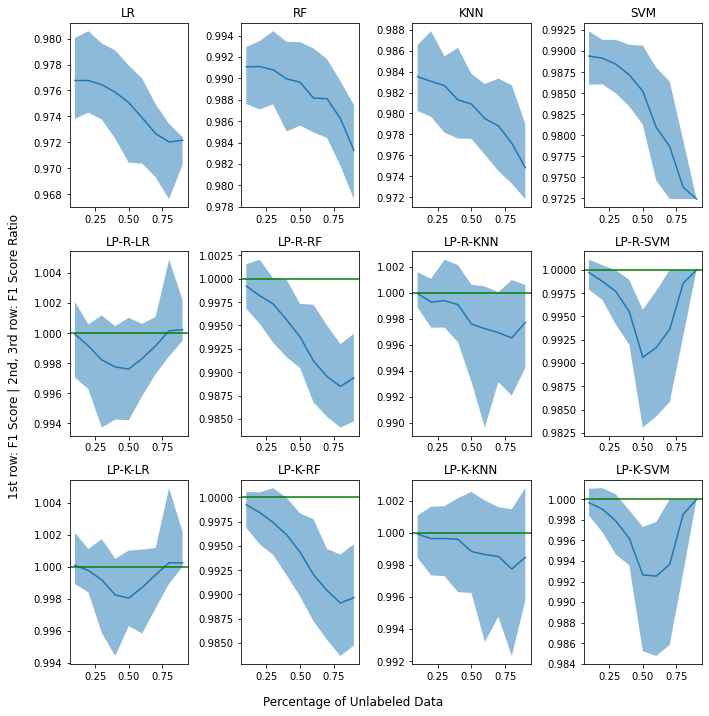

In [10]:
# Data set reference:
# [5] A hybrid pansharpening approach and multiscale object-based image analysis for mapping diseased pine and oak trees (Johnson B., Tateishi R. & Hoan, N., 2013)

X, y = preprocessData(pd.read_csv('C:/Users/Puri/Desktop/repos/Experimentation/datasets/wilt.csv', sep = '\t'),
              numeric_features = ['GLCM_pan', 'Mean_Green', 'Mean_Red', 'Mean_NIR', 'SD_pan'],
              categorical_features = [],
              target = 'class',
              label_dic = {'w': 0, 'n': 1})

#increased max iterations to 5k to ensure convergence
experiment = runExperiment(n_splits = 30, test_size = 0.2, f1_average_param = 'binary', max_iter = 5000)
experiment.fit(X,y)
experiment.plot()

LP was detrimental.

nrows:  303
n_features (post encoding):  132
target distribution:  1    216
0     87
Name: Cath, dtype: int64


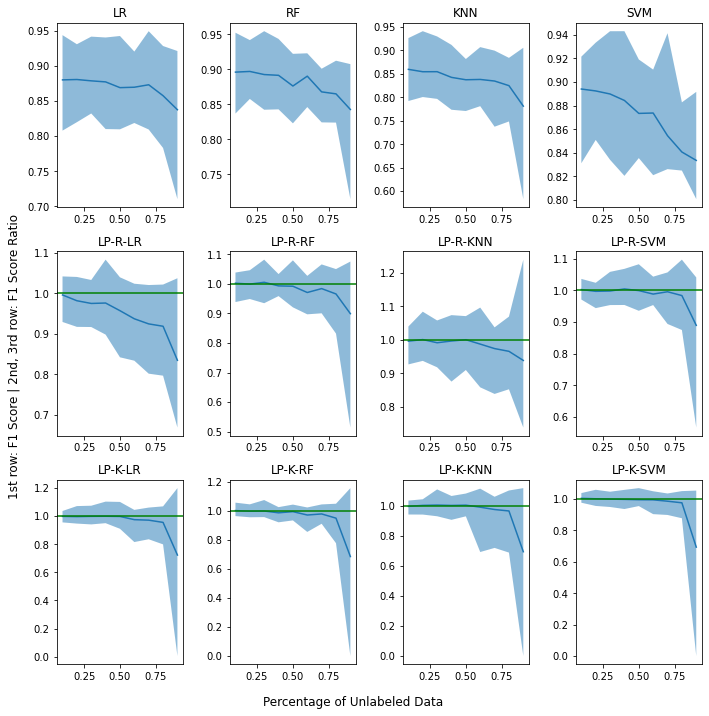

In [11]:
# Data set reference:
# [6] A data mining approach for diagnosis of coronary artery disease (R. Alizadehsani et al 2013)

X, y = preprocessData(pd.read_csv('C:/Users/Puri/Desktop/repos/Experimentation/datasets/Z-Alizadeh sani.csv', sep = '\t'),
              numeric_features = ['Age', 'Weight', 'Length', 'BMI', 'FBS', 'CR', 'TG', 'LDL', 'HDL', 'BUN', 'ESR',
                                 'HB', 'K', 'Na', 'WBC', 'Lymph', 'Neut', 'PLT', 'EF-TTE'],
              categorical_features = ['Sex', 'DM', 'HTN', 'Current Smoker', 'EX-Smoker', 'FH', 'Obesity', 'CRF', 'CVA',
                                      'Airway Disease', 'Thyroid Disease', 'CHF', 'DLP', 'BP', 'PR', 'Edema',
                                      'Weak Peripheral Pulse', 'Lung Rales', 'Systolic Murmur', 'Diastolic Murmur',
                                     'Typical Chest Pain', 'Dyspnea', 'Function Class', 'Atypical', 'Nonanginal',
                                     'Exertional CP', 'LowTH Ang', 'Q Wave', 'St Elevation', 'St Depression', 'Tinversion',
                                     'LVH', 'Poor R Progression', 'BBB', 'Region RWMA', 'VHD' ],
              target = 'Cath',
              label_dic = {'Normal': 0, 'Cad': 1})

experiment = runExperiment(n_splits = 30, test_size = 0.2, f1_average_param = 'binary')
experiment.fit(X,y)
experiment.plot()

LP was detrimental.

nrows:  756
n_features (post encoding):  756
target distribution:  1    564
0    192
Name: class, dtype: int64


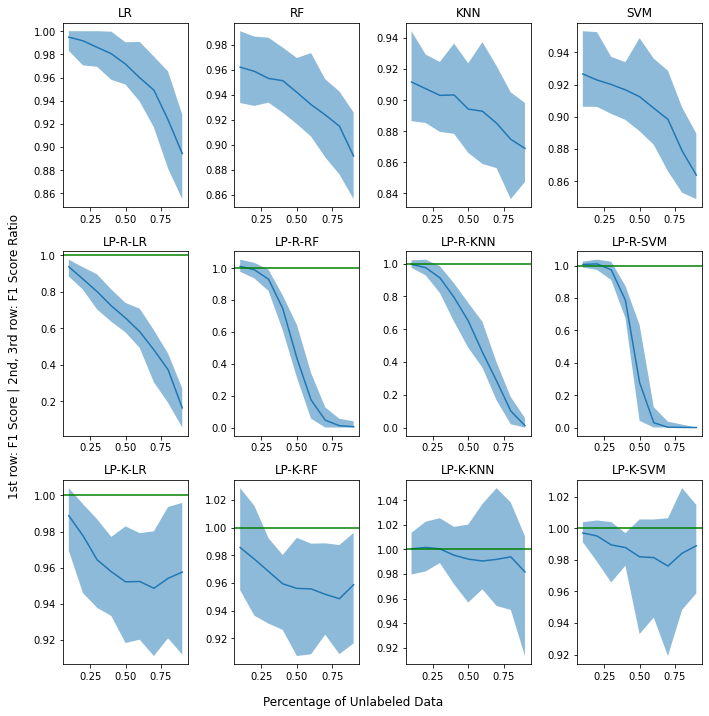

In [12]:
# Data set reference
# [7] A comparative analysis of speech signal processing algorithms for Parkinson's disease classification and the use of the tunable Q-factor wavelet transform. (Sakar C.O., Serbes G., Gunduz A., Tunc H.C., Nizam H., Sakar B.E., Tutuncu M., Aydin T., Isenkul M.E. & Apaydin H., 2018)

X, y = preprocessData(pd.read_csv('C:/Users/Puri/Desktop/repos/Experimentation/datasets/pd_speech_features.csv', sep = '\t'),
              numeric_features = 'remaining',
              categorical_features = ['gender'],
              target = 'class',
              label_dic = None)

experiment = runExperiment(n_splits = 30, test_size = 0.2, f1_average_param = 'binary')
experiment.fit(X,y)
experiment.plot()

LP was detrimental. Infact, LP-R annihilated the model performance. Tuning gamma may help here but due to overflow/underflow issues this isn't easy.

nrows:  476
n_features (post encoding):  166
target distribution:  0    269
1    207
Name: class, dtype: int64


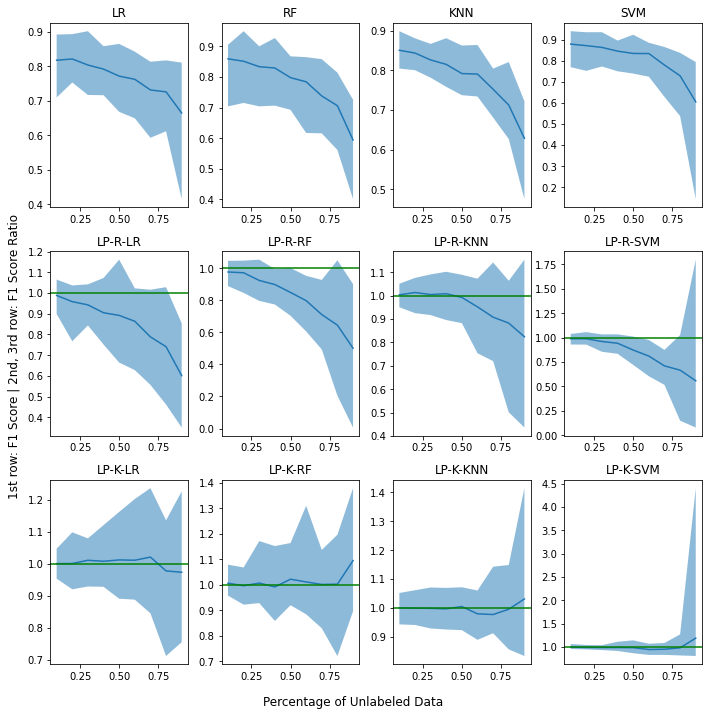

In [13]:
# Data set reference
# [8] UCI Machine Learning Repository (Dua, D. & Graff, C. 2019)

X, y = preprocessData(pd.read_csv('C:/Users/Puri/Desktop/repos/Experimentation/datasets/musk.csv'),
              numeric_features = ['f' + str(i) for i in range(1,167)],
              categorical_features = [],
              target = 'class',
              label_dic = None)

#increased max iterations to 10k to ensure convergence
experiment = runExperiment(n_splits = 30, test_size = 0.2, f1_average_param = 'binary', max_iter = 10000)
experiment.fit(X,y)
experiment.plot()

On average, LP-R was significantly detrimental whereas LP-K had mixed results. However, both had the potential to be significantly beneficial.

nrows:  4601
n_features (post encoding):  58
target distribution:  0    2788
1    1813
Name: spam, dtype: int64


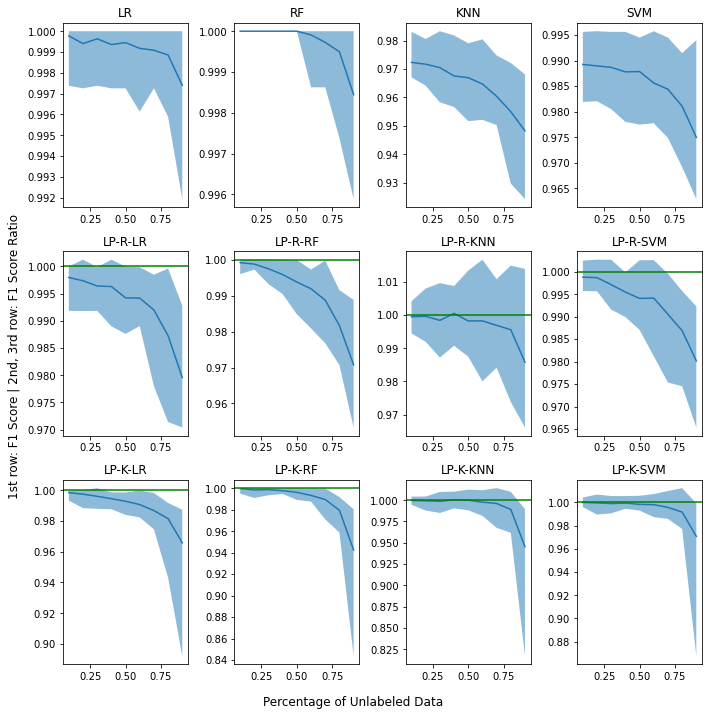

In [14]:
# Data set reference
# [9] UCI Machine Learning Repository (Dua, D. & Graff, C. 2019)

X, y = preprocessData(pd.read_csv('C:/Users/Puri/Desktop/repos/Experimentation/datasets/spambase.csv'),
              numeric_features = 'remaining',
              categorical_features = [],
              target = 'spam',
              label_dic = None)

#increased max iterations to 20k to ensure convergence
experiment = runExperiment(n_splits = 30, test_size = 0.2, f1_average_param = 'binary', max_iter = 20000)
experiment.fit(X,y)
experiment.plot()

LP was detrimental

## Conclusion

For small, regular classification (no NLP), LP was generally not benefitial. However, there were few cases with a significant improvement in performance. For this reason I would say it's worth trying as long as you validate.